In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import sys
from tqdm import tqdm
import pathlib
from pathlib import Path
import contextlib
import io
import go_pybindings as go
import gaps_online.db as db

Can't load CXX API! No module named 'gaps_tof'


In [2]:
f_names = ['/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30198.txt', 
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30196.txt', 
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30142.txt', 
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30141.txt',
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30090.txt',
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30059.txt',
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30029.txt',
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_30025.txt',
           '/Users/gracetytus/gaps/analysis/grace/intermediaries/output_144.txt']

te_timeouts = [25, 25, 25, 25, 40, 40, 40, 40, 20]

In [16]:
avg_hg_dropped = []

for name in tqdm(f_names):
    with open(name) as in_file:
        variables = next(in_file).strip().split(',')
        
        # Initialize a list to store 'percent_dropped_hg' values for this file
        percent_dropped_hg_values = []
        
        for line in in_file:
            data = line.strip().split(',')
            data_dict = {variables[i]: float(data[i]) for i in range(len(variables))}
            
            # Collect 'percent_dropped_hg' value
            percent_dropped_hg_values.append(data_dict['percent_dropped_hg'])
    
    # Calculate the average for 'percent_dropped_hg' in the current file
    avg = np.average(percent_dropped_hg_values)
    avg_hg_dropped.append(avg)

print(avg_hg_dropped)


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 544.60it/s]

[np.float64(0.4246450304259635), np.float64(0.924439461883408), np.float64(1.5523148148148147), np.float64(0.5898477157360407), np.float64(0.40440298507462685), np.float64(0.8891465677179963), np.float64(1.2519562715765244), np.float64(4.924037600716205), np.float64(17.68400692840647)]


In [24]:
plt.style.use('publication.rc')

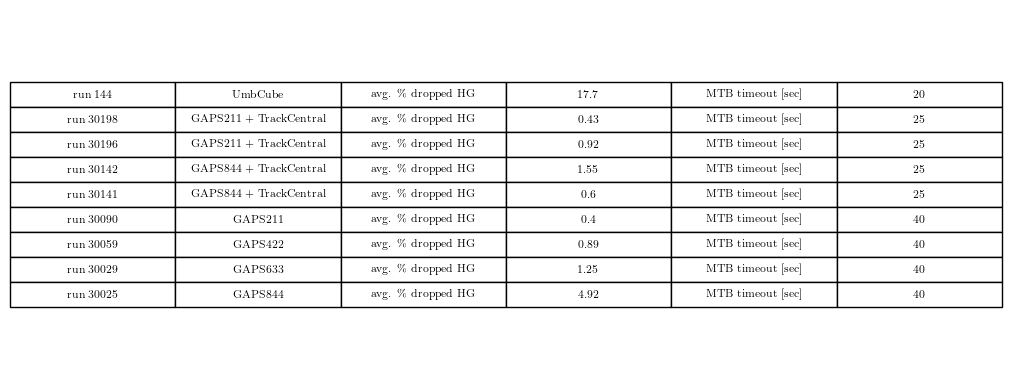

In [33]:
# Define table data
table_data = [
            ['run 144', 'UmbCube', 'avg. \\% dropped HG', 17.7, 'MTB timeout [sec]', 20],
            ['run 30198', 'GAPS211 + TrackCentral', 'avg. \\% dropped HG', 0.43, 'MTB timeout [sec]', 25],
            ['run 30196', 'GAPS211 + TrackCentral', 'avg. \\% dropped HG', 0.92, 'MTB timeout [sec]', 25],
            ['run 30142', 'GAPS844 + TrackCentral', 'avg. \\% dropped HG', 1.55, 'MTB timeout [sec]', 25],
            ['run 30141', 'GAPS844 + TrackCentral', 'avg. \\% dropped HG', 0.60, 'MTB timeout [sec]', 25],
            ['run 30090', 'GAPS211', 'avg. \\% dropped HG', 0.40, 'MTB timeout [sec]', 40],
            ['run 30059', 'GAPS422', 'avg. \\% dropped HG', 0.89, 'MTB timeout [sec]', 40],
            ['run 30029', 'GAPS633', 'avg. \\% dropped HG', 1.25, 'MTB timeout [sec]', 40],
            ['run 30025', 'GAPS844', 'avg. \\% dropped HG', 4.92, 'MTB timeout [sec]', 40]]
# Create figure and set axis to be invisible
fig, ax = plt.subplots()
ax.axis('off')  # Hide the axes

# Create table with customization
table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='center')  # Center the table in the figure

# Custom font size and scale
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(2.0, 1.5)

# # Customize each cell
# num_rows, num_cols = len(table_data), len(table_data[0])

# for (row, col), cell in table.get_celld().items():
#     if row == -1 or col == -1:
#         continue

#     cell.set_height(0.08)

#     if col == 1:
#         cell.set_text_props(horizontalalignment='center', verticalalignment='center')
#         cell.set_width(0.1)
#     else:
#         cell.set_text_props(horizontalalignment='right', verticalalignment='center')
#         cell.set_width(0.35)

#     cell.set_linewidth(0.5)

# Adjust figure size to match the table size closely
#fig.set_size_inches(3, 4)  # Customize the figure size as needed

plt.show()

In [39]:
data =  [
            [         'Trigger', 'avg. \\% HG dropped', 'MTB timout [sec]'],
            [ '144',  'UmbCube', 17.7, 20],
            ['30198',  'GAPS211 + TrackCentral', 0.43,   25],
            ['30196',  'GAPS211 + TrackCentral', 0.92,   25],
            ['30142',  'GAPS844 + TrackCentral', 1.55,   25],
            ['30141',  'GAPS844 + TrackCentral', 0.60,   25],
            ['30090',  'GAPS211', 0.40,   25],
            ['30059',  'GAPS422', 0.89,   25],
            ['30029',  'GAPS633', 1.25,   25],
            ['30025',  'GAPS844', 4.92,   25]
        ]
# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x/1000:1.1f}' for x in row])

fig = plt.gcf()
# plt.savefig('pyplot-table-original.png',
#             bbox_inches='tight',
#             dpi=150
#             )

plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'